In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### 계단 함수

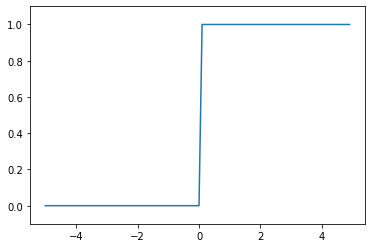

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid 함수

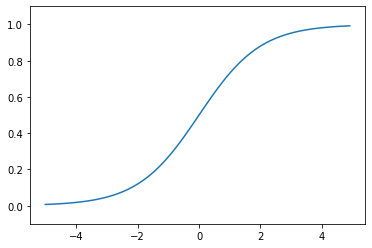

In [4]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축의 범위
plt.show()

### ReLU 함수

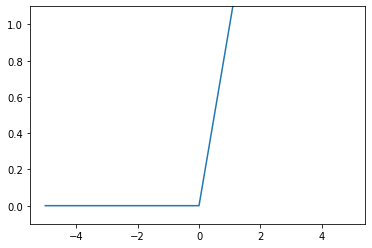

In [5]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축의 범위
plt.show()

### tanh 함수

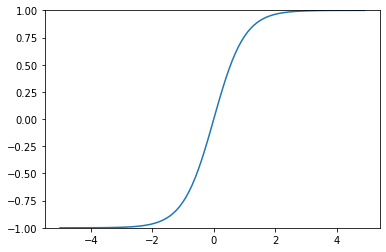

In [7]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
  t1 = np.exp(x) - np.exp(-x)
  t2 = np.exp(x) + np.exp(-x)
  return t1 / t2

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)

plt.plot(x, y)
plt.ylim(-1.0, 1.0)   # y축의 범위
plt.show()  

### Sigmoid와 tanh

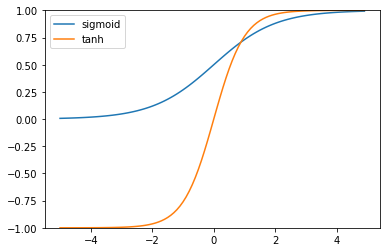

In [8]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

def tanh(x):
  t1 = np.exp(x) - np.exp(-x)
  t2 = np.exp(x) + np.exp(-x)
  return t1 / t2

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = tanh(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['sigmoid', 'tanh'])   # 범례
plt.ylim(-1.0, 1.0)   # y축의 범위
plt.show()  

### Sigmoid와 ReLU

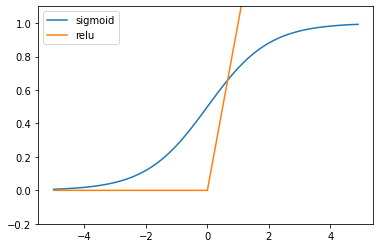

In [9]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = relu(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['sigmoid', 'relu'])   # 범례
plt.ylim(-0.2, 1.1)   # y축의 범위
plt.show()  

### 손실 함수

In [10]:
# 방법1(추천)

import numpy as np

def mse(y, t):    # mean_squared_error
  return 0.5 * np.sum(y - t) ** 2

def cee(y, t):    # cross_entropy_error
  delta = 0.0000001   # le-7
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

print('mean_squared_error = ', mse(np.array(y), np.array(t)))
print('cross_entropy_error = ', cee(np.array(y), np.array(t)))

mean_squared_error =  0.0
cross_entropy_error =  0.510825457099338


In [12]:
# 방법2

import numpy as np

def mse(y, t):
  if n.ndim == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  return 0.5 * np.sum((y - t) ** 2) / y.shape[0]

def cee(y, t):
  delta = 0.0000001   # le-7
  if y.ndim == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)

  if t.size == y.size:
    t = t.argmax(axis = 1)

  return -np.sum(t * np.log(y[np.arange(y.shape[0]), t])) / y.shape[0]

### One Hot Encoding

In [15]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
# data = ['Windows', 'Unix', 'Solaris', 'Linux']
data = ['Linux', 'Solaris', 'Unix', 'Windows']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print('\n', integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('\n', onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0,:])])
print('\n', inverted)

['Linux' 'Solaris' 'Unix' 'Windows']

 [0 1 2 3]

 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 ['Linux']
